# Imports

In [153]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans 
from sklearn import preprocessing

In [4]:
test=yf.Ticker('AAPL')
test.info.get('currentPrice')

214.4

# Ticker List

In [6]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].values.tolist()
tickers = [s.replace('\n', '') for s in tickers]
tickers = [s.replace('.', '-') for s in tickers]
tickers = [s.replace(' ', '') for s in tickers]
# tickers = [
#     "ITC.NS", "HINDUNILVR.NS", "POWERGRID.NS", "COALINDIA.NS", "NTPC.NS",
#     "BAJAJ-AUTO.NS", "NESTLEIND.NS", "HDFCLIFE.NS", "PGHH.NS", "PIDILITIND.NS",
#     "ADANIENT.NS", "RELIANCE.NS", "TATAMOTORS.NS", "IDEA.NS", "ZEEL.NS",
#     "INDUSINDBK.NS", "YESBANK.NS", "BANDHANBNK.NS", "IRCTC.NS",
#     "SBIN.NS", "PNB.NS", "ICICIBANK.NS", "TATAPOWER.NS", "TATACHEM.NS",
#     "VOLTAS.NS", "SAIL.NS", "ASHOKLEY.NS", "BANKBARODA.NS", "DLF.NS","AAPL","KSS","TXN","LMT","ISRG","ENPH","COF","NIO",
#     "DNUT","GM","LCID","NVDA","NOC","GPRO","PEGA","TLRY","CB","PM","SAP","RIG","DHI","VST","FFAI","CEG"
# ]

len(tickers)


503

# Storing relevent details of Tickers in a Pandas Dataframe

In [8]:
stock_data=[]
for ticker in tickers:
     try:
        info=yf.Ticker(ticker).info
        stock_data.append({
            'ticker':ticker,
            'currentPrice':info.get('currentPrice'),
            'beta':info.get('beta'),
            'marketCap':info.get('marketCap'),
            'volume': info.get('volume'),
            'dividendYield': info.get('dividendYield'),
            'sector': info.get('sector')
        })
     except Exception as e:
        print(f"Failed: {ticker} - {e}")
dataset=pd.DataFrame(stock_data)
print(dataset.head())
print(dataset.describe())

  ticker  currentPrice   beta     marketCap   volume  dividendYield  \
0    MMM        151.20  1.079   80533659648  4033766           1.93   
1    AOS         71.10  1.203   10103949312  1349794           1.91   
2    ABT        125.73  0.732  218750091264  6060051           1.88   
3   ABBV        187.11  0.481  330511089664  4427238           3.51   
4    ACN        286.96  1.293  178733891584  3613485           2.06   

        sector  
0  Industrials  
1  Industrials  
2   Healthcare  
3   Healthcare  
4   Technology  
       currentPrice        beta     marketCap        volume  dividendYield
count    503.000000  474.000000  5.030000e+02  5.030000e+02     407.000000
mean     225.575358    0.999854  1.176246e+11  5.721400e+06       2.308084
std      496.792968    0.428798  3.608657e+11  1.232272e+07       1.572087
min        9.240000    0.004000  5.576297e+09  2.703300e+04       0.020000
25%       71.930000    0.703250  2.013179e+10  1.203811e+06       1.065000
50%      128.890000  

# Handling NULL/Missing values

In [10]:
dataset = pd.get_dummies(dataset, columns=['sector'], drop_first=True)
dataset.head()

,ticker,currentPrice,beta,marketCap,volume,dividendYield,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
0,MMM,151.20,1.079,80533659648,4033766,1.93,False,False,False,False,False,False,True,False,False,False
1,AOS,71.10,1.203,10103949312,1349794,1.91,False,False,False,False,False,False,True,False,False,False
2,ABT,125.73,0.732,218750091264,6060051,1.88,False,False,False,False,False,True,False,False,False,False
3,ABBV,187.11,0.481,330511089664,4427238,3.51,False,False,False,False,False,True,False,False,False,False
4,ACN,286.96,1.293,178733891584,3613485,2.06,False,False,False,False,False,False,False,False,True,False


In [11]:
dataset.isnull()

,ticker,currentPrice,beta,marketCap,volume,dividendYield,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset_cleaned=dataset.dropna(subset=dataset.columns.difference(['ticker']),how='all')

In [13]:
dataset_cleaned['dividendYield'].isnull().sum()

96

## Handling missing values in Dividend Yield

In [15]:
missing_dividend_tickers = dataset[dataset['dividendYield'].isna()]['ticker'].tolist()
missing_dividend_tickers

['ADBE',
 'AMD',
 'ABNB',
 'AKAM',
 'ALGN',
 'AMZN',
 'APTV',
 'ACGL',
 'ANET',
 'ADSK',
 'AZO',
 'AXON',
 'BRK-B',
 'BIIB',
 'XYZ',
 'BA',
 'BSX',
 'BLDR',
 'CDNS',
 'CZR',
 'KMX',
 'CCL',
 'CBRE',
 'CNC',
 'CRL',
 'CHTR',
 'CMG',
 'COIN',
 'COO',
 'CPRT',
 'CPAY',
 'CSGP',
 'CRWD',
 'DDOG',
 'DVA',
 'DAY',
 'DECK',
 'DXCM',
 'DLTR',
 'DASH',
 'EW',
 'ENPH',
 'EPAM',
 'FFIV',
 'FICO',
 'FSLR',
 'FI',
 'FTNT',
 'IT',
 'GNRC',
 'GDDY',
 'HSIC',
 'HOLX',
 'IDXX',
 'INCY',
 'PODD',
 'INTC',
 'ISRG',
 'IQV',
 'KEYS',
 'LYV',
 'LULU',
 'MTD',
 'MGM',
 'MRNA',
 'MHK',
 'MOH',
 'MNST',
 'NFLX',
 'NCLH',
 'NVR',
 'ORLY',
 'ON',
 'PLTR',
 'PANW',
 'PYPL',
 'PTC',
 'NOW',
 'SOLV',
 'SMCI',
 'SNPS',
 'TTWO',
 'TDY',
 'TSLA',
 'TTD',
 'TDG',
 'TRMB',
 'TYL',
 'UBER',
 'ULTA',
 'UAL',
 'VRTX',
 'WBD',
 'WAT',
 'WDAY',
 'ZBRA']

In [16]:
dy_test=yf.Ticker(missing_dividend_tickers[0])
(dy_test.history(period='10y',interval='3mo')['Dividends'])

Date
2015-07-01 00:00:00-04:00    0.0
2015-10-01 00:00:00-04:00    0.0
2016-01-01 00:00:00-05:00    0.0
2016-04-01 00:00:00-04:00    0.0
2016-07-01 00:00:00-04:00    0.0
2016-10-01 00:00:00-04:00    0.0
2017-01-01 00:00:00-05:00    0.0
2017-04-01 00:00:00-04:00    0.0
2017-07-01 00:00:00-04:00    0.0
2017-10-01 00:00:00-04:00    0.0
2018-01-01 00:00:00-05:00    0.0
2018-04-01 00:00:00-04:00    0.0
2018-07-01 00:00:00-04:00    0.0
2018-10-01 00:00:00-04:00    0.0
2019-01-01 00:00:00-05:00    0.0
2019-04-01 00:00:00-04:00    0.0
2019-07-01 00:00:00-04:00    0.0
2019-10-01 00:00:00-04:00    0.0
2020-01-01 00:00:00-05:00    0.0
2020-04-01 00:00:00-04:00    0.0
2020-07-01 00:00:00-04:00    0.0
2020-10-01 00:00:00-04:00    0.0
2021-01-01 00:00:00-05:00    0.0
2021-04-01 00:00:00-04:00    0.0
2021-07-01 00:00:00-04:00    0.0
2021-10-01 00:00:00-04:00    0.0
2022-01-01 00:00:00-05:00    0.0
2022-04-01 00:00:00-04:00    0.0
2022-07-01 00:00:00-04:00    0.0
2022-10-01 00:00:00-04:00    0.0
2023-

#### see if a company has atleast 5 non-zero dividend values in the past 10 years. If yes, then apply time series forecasting to predict the missing dividend yield value, else fill the value with 0.

In [18]:
def forecast_dividend_yield(series, ticker_symbol):
    try:
        series = series[series > 0]
        series.index = pd.to_datetime(series.index)
        series = series.resample('QE').sum()

        if len(series) < 6:
            return series.mean()

        model = ExponentialSmoothing(series, trend='add', seasonal=None).fit()
        forecast = model.forecast(1).iloc[0]

        price_series = yf.download(ticker_symbol, period="1d", auto_adjust=True)['Close']
        latest_price = price_series.iloc[-1] if not price_series.empty else 1

        return round((forecast * 4 / latest_price) * 100, 2)

    except Exception as e:
        print(f"Forecast failed: {e}")
        return series.mean()


def handle_missing_dividendYield(missing_dividend_ticker, threshold=5):
    ticker = yf.Ticker(missing_dividend_ticker)
    try:
        dividend_history = ticker.history(period="10y")["Dividends"]
        non_zero_count = (dividend_history > 0).sum()
        if non_zero_count < threshold:
            return 0.0 
        else:
            return forecast_dividend_yield(dividend_history,missing_dividend_ticker)
    except Exception as e:
        print(f"Error fetching data for {missing_dividend_ticker}: {e}")
        return 0.0

In [19]:
dividend_map={}
for ticker in missing_dividend_tickers:
    dataset.loc[dataset['ticker'] == ticker, 'dividendYield'] = handle_missing_dividendYield(ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:1418: RuntimeWarning: invalid value encountered in scalar add
  aicc = aic + aicc_penalty
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np

## Handling missing values in Current Price

In [21]:
missing_currentPrice_tickers = dataset[dataset['currentPrice'].isna()]['ticker'].tolist()
missing_currentPrice_tickers

[]

### Let's fallback to the recent closing price

In [23]:
def handle_missing_current_price(ticker_symbol):
    try:
        ticker = yf.Ticker(ticker_symbol)
        price = ticker.info.get('currentPrice', None)
        if price is None:
            hist = ticker.history(period="1d", interval="1m")
            if not hist.empty and 'Close' in hist.columns:
                price = hist['Close'].iloc[-1]
                print(f"Fetched fallback price for {ticker_symbol}: {price}")
        
        return price if price is not None else np.nan
    except Exception as e:
        print(f"Error fetching price for {ticker_symbol}: {e}")
        return np.nan

In [24]:
price_map = {}
for ticker in missing_currentPrice_tickers:
    price_map[ticker] = handle_missing_current_price(ticker)

dataset['currentPrice'] = dataset.apply(
    lambda row: price_map[row['ticker']] if pd.isna(row['currentPrice']) and row['ticker'] in price_map else row['currentPrice'],
    axis=1
)

## Handling missing values in Beta

### Let's see the correlation between Beta and other Features

In [27]:
df_beta_notna = dataset[dataset['beta'].notna()]
numeric_cols = df_beta_notna.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('beta')
correlations = df_beta_notna[numeric_cols + ['beta']].corr()
print(correlations['beta'].sort_values(ascending=False))

beta             1.000000
volume           0.246794
marketCap        0.110826
currentPrice     0.048764
dividendYield   -0.358694
Name: beta, dtype: float64


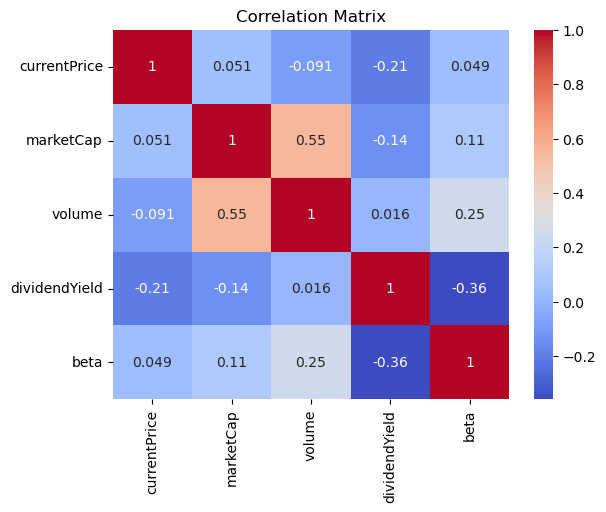

In [28]:
sns.heatmap(df_beta_notna[numeric_cols + ['beta']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Using beta formula to calculate missing beta values

In [30]:
def calculate_beta(stock_symbol, market_symbol="^GSPC", period="6mo", interval="1d"):
    stock_data = yf.download(stock_symbol, period=period, interval=interval, auto_adjust=False)
    market_data = yf.download(market_symbol, period=period, interval=interval, auto_adjust=False)

    if stock_data.empty or market_data.empty:
        print(f"No data for {stock_symbol} or market index")
        return None

    if 'Adj Close' not in stock_data.columns or 'Adj Close' not in market_data.columns:
        print(f"'Adj Close' not found for {stock_symbol}")
        return None

    stock_close = stock_data['Adj Close']
    market_close = market_data['Adj Close']

    df = pd.concat([stock_close, market_close], axis=1, join='inner')
    df.columns = ['stock', 'market']
    df = df.dropna()

    if df.empty or len(df) < 2:
        print(f"Insufficient data to calculate beta for {stock_symbol}")
        return None

    df['stock_return'] = df['stock'].pct_change()
    df['market_return'] = df['market'].pct_change()
    df = df.dropna()

    covariance = df['stock_return'].cov(df['market_return'])
    market_variance = df['market_return'].var()

    if pd.isna(covariance) or pd.isna(market_variance) or market_variance == 0:
        print(f"NaN in covariance or variance for {stock_symbol}")
        return None

    beta = covariance / market_variance
    return beta


In [31]:
missing_beta_tickers = dataset[dataset['beta'].isna()]['ticker'].tolist()

beta_map = {}
for ticker in missing_beta_tickers:
    beta_map[ticker] = calculate_beta(ticker)

dataset['beta'] = dataset.apply(
    lambda row: beta_map.get(row['ticker'], None) if pd.isna(row['beta']) else row['beta'],
    axis=1
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Handling missing volume values

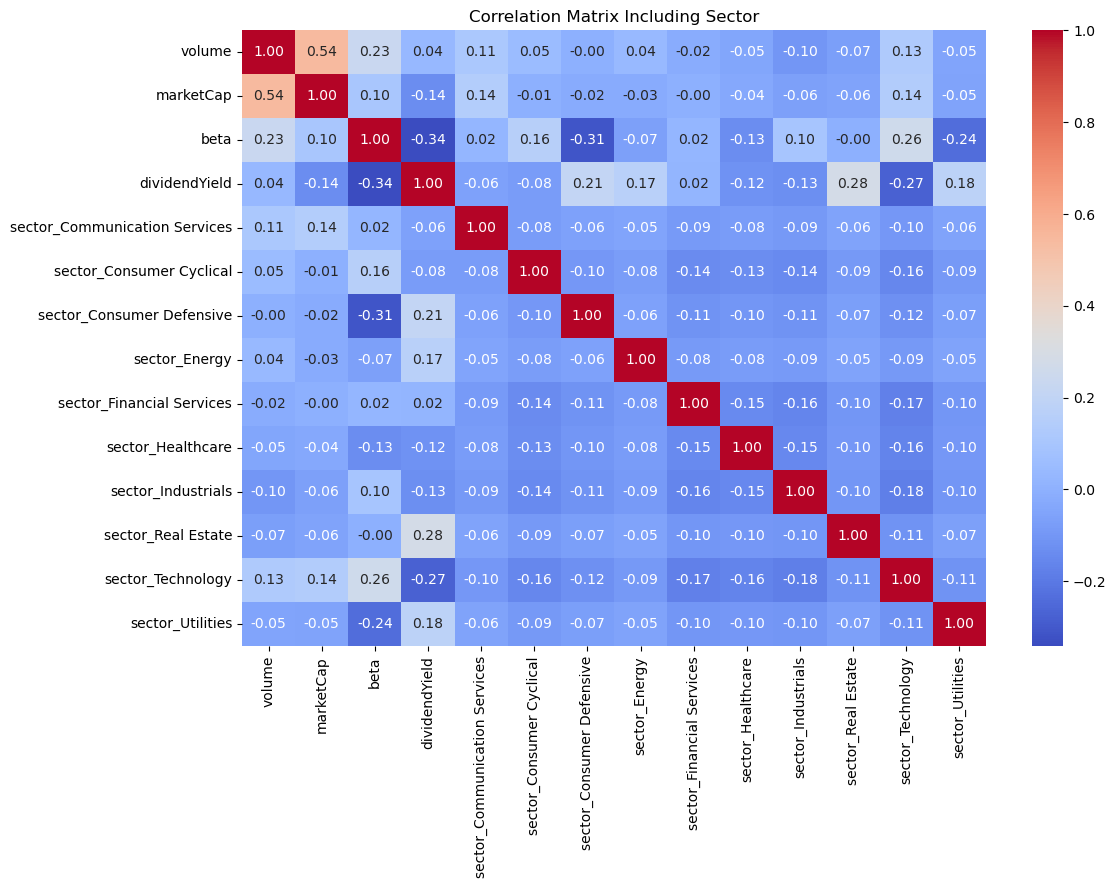

In [33]:
volume_df = dataset[dataset['volume'].notna()]
sector_columns = [col for col in volume_df.columns if col.startswith('sector_')]
numeric_cols = ['volume', 'marketCap', 'beta', 'dividendYield'] + sector_columns

corr_matrix = volume_df[numeric_cols].corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Sector")
plt.show()

### Let's just take the average value from historical data 

In [35]:
def get_avg_volume(ticker):
    try:
        hist = yf.download(ticker, period="6mo", interval="1d")
        return hist['Volume'].mean()
    except:
        return np.nan

for i, row in dataset[dataset['volume'].isna()].iterrows():
    dataset.at[i, 'volume'] = get_avg_volume(row['ticker'])

## Handling missing market cap values

### Let's use Linear Regression model to predict the missing values

In [38]:
from sklearn.linear_model import LinearRegression

train_df = dataset[~dataset['marketCap'].isna()]
X_train = train_df.drop(columns=['marketCap', 'ticker'])
y_train = train_df['marketCap']
X_train = X_train.dropna()
y_train = y_train[X_train.index] 

marketcap_model = LinearRegression()
marketcap_model.fit(X_train, y_train)

missing_df = dataset[dataset['marketCap'].isna()]
if not missing_df.empty:
    X_missing = missing_df.drop(columns=['marketCap', 'ticker'])
    marketcap_predictions = marketcap_model.predict(X_missing)
    dataset.loc[dataset['marketCap'].isna(), 'marketCap'] = marketcap_predictions
else:
    print(" No missing marketCap values to fill.")


 No missing marketCap values to fill.


### Now let's drop all the missing values from the dataset if there still are any left

In [40]:
dataset=dataset.dropna()

## Let's visualise the data to get an idea about the trend

### Let's plot volatility vs returns

In [44]:
def fetch_close_prices(tickers, start='2024-01-01', end='2025-01-01'):
    data = yf.download(tickers, start=start, end=end)['Close']
    data = data.stack().reset_index()
    data.columns = ['Date', 'Ticker', 'Close']
    return data

In [45]:
close_data = fetch_close_prices(tickers)

/var/folders/5p/f4tttk6s4j71d_lr2dk18brc0000gn/T/ipykernel_99126/2914521714.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  503 of 503 completed


In [46]:
close_data['log_return'] = close_data.groupby('Ticker')['Close'].transform(lambda x: np.log(x / x.shift(1)))

close_data['volatility_30d'] = close_data.groupby('Ticker')['log_return'].transform(lambda x: x.rolling(window=30).std())
close_data['return_30d'] = close_data.groupby('Ticker')['log_return'].transform(lambda x: x.rolling(30).mean())

latest_data = close_data.dropna(subset=['return_30d', 'volatility_30d'])

latest_features = latest_data.sort_values('Date').groupby('Ticker').tail(1)[['Ticker', 'return_30d', 'volatility_30d']]
latest_features.columns = ['ticker', 'return', 'volatility']

dataset = dataset.merge(latest_features, on='ticker', how='left')
print(dataset.columns.tolist())


['ticker', 'currentPrice', 'beta', 'marketCap', 'volume', 'dividendYield', 'sector_Communication Services', 'sector_Consumer Cyclical', 'sector_Consumer Defensive', 'sector_Energy', 'sector_Financial Services', 'sector_Healthcare', 'sector_Industrials', 'sector_Real Estate', 'sector_Technology', 'sector_Utilities', 'return', 'volatility']


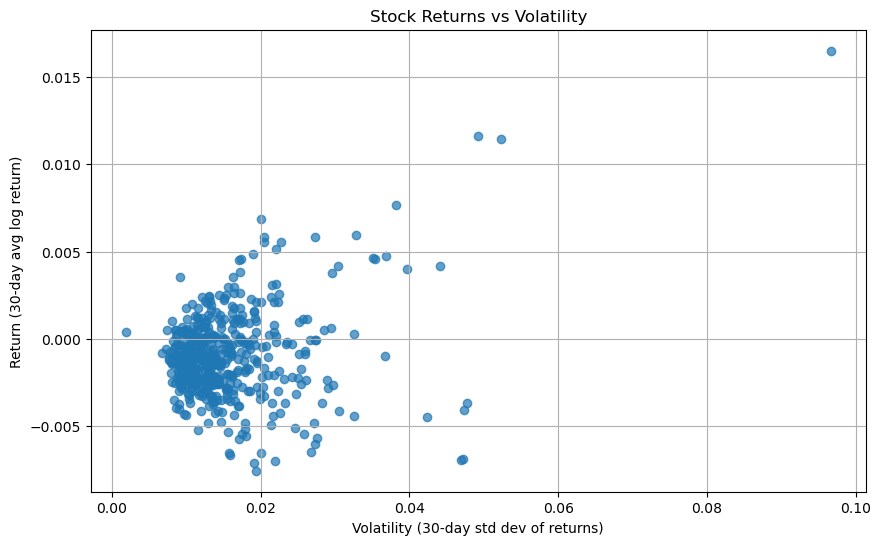

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['volatility'], dataset['return'], alpha=0.7)
plt.xlabel('Volatility (30-day std dev of returns)')
plt.ylabel('Return (30-day avg log return)')
plt.title('Stock Returns vs Volatility')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Elbow curve')

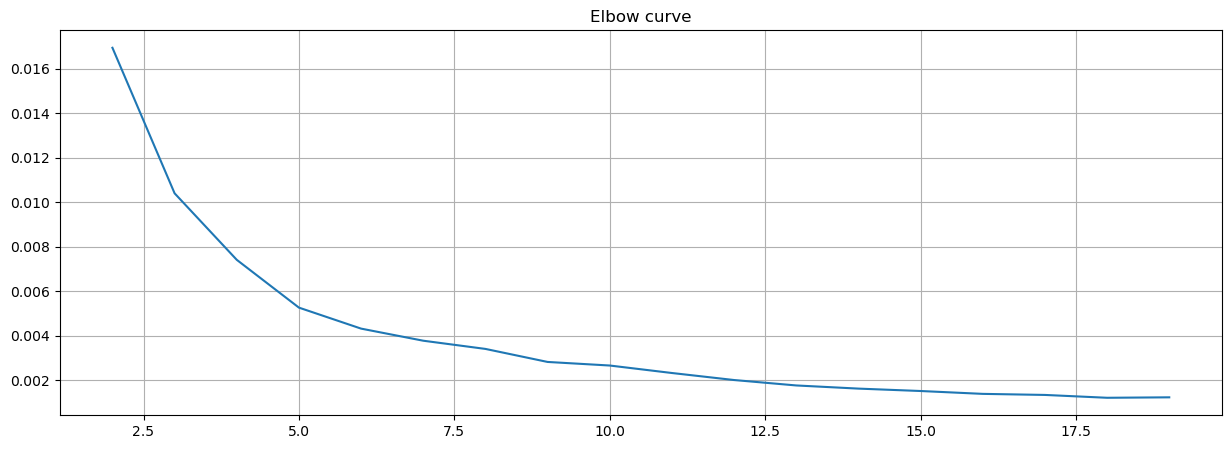

In [93]:
    data = np.asarray([np.asarray(dataset['return']),np.asarray(dataset['volatility'])]).T
    X = data
    distorsions = []
    for k in range(2, 20):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
        distorsions.append(k_means.inertia_)
    fig = plt.figure(figsize=(15, 5))
    
    plt.plot(range(2, 20), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')

  ticker    Return  Volatility  cluster
0    MMM -0.000180    0.010688        0
1    AOS -0.001909    0.011209        3
2    ABT -0.000812    0.008183        3
3   ABBV  0.002474    0.013036        0
4    ACN -0.000168    0.016957        0


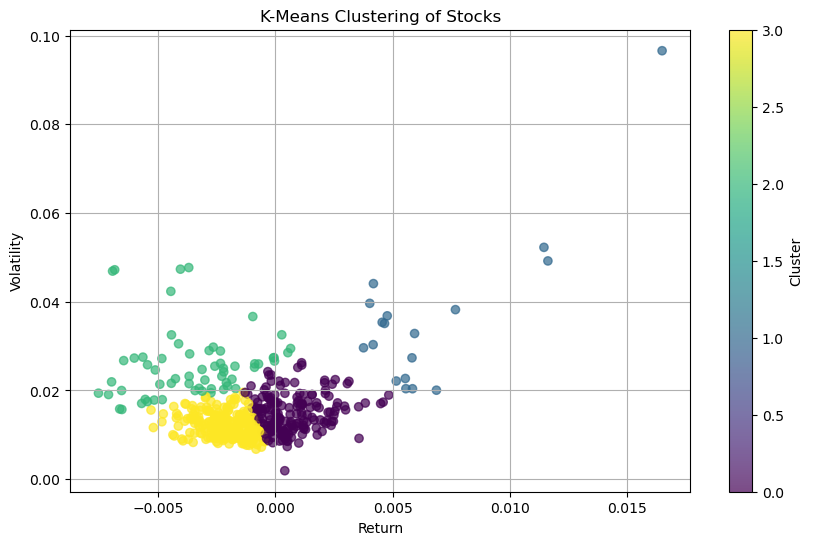

In [157]:

data = np.asarray([np.asarray(dataset['return']), np.asarray(dataset['volatility'])]).T
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
centroids, _ = kmeans(scaled_data, 4)

cluster_indices, _ = vq(scaled_data, centroids)

cluster_info = [(ticker, cluster) for ticker, cluster in zip(dataset.index, cluster_indices)]
cluster_df = pd.DataFrame(cluster_info, columns=['ticker', 'cluster'])

stock_df = dataset.reset_index()  
stock_df['cluster'] = cluster_df['cluster']

stock_df = stock_df[['ticker', 'return', 'volatility', 'cluster']]
stock_df.columns = ['ticker', 'Return', 'Volatility', 'cluster']

print(stock_df.head())
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    stock_df['Return'],
    stock_df['Volatility'],
    c=stock_df['cluster'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel("Return")
plt.ylabel("Volatility")
plt.title("K-Means Clustering of Stocks")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


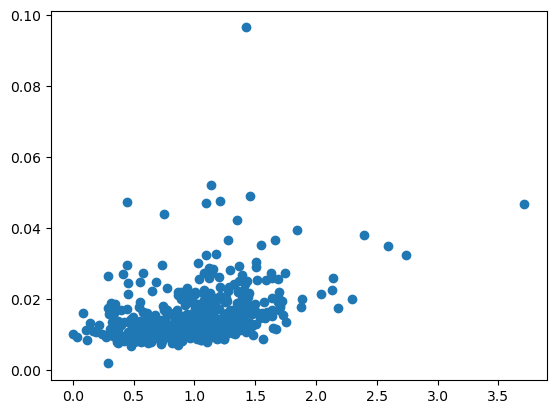

In [114]:
plt.scatter(dataset['beta'],dataset['volatility'])
plt.show()

In [159]:
data = np.asarray([dataset['return'], dataset['volatility'], dataset['beta']]).T
scaled_data = scaler.fit_transform(data)
centroids, _ = kmeans(scaled_data, 4)

cluster_indices, _ = vq(scaled_data, centroids)

cluster_info = [(ticker, cluster) for ticker, cluster in zip(dataset.index, cluster_indices)]
cluster_df = pd.DataFrame(cluster_info, columns=['ticker', 'cluster'])

stock_df = dataset.reset_index()  
stock_df['cluster'] = cluster_df['cluster']

stock_df = stock_df[['ticker', 'return', 'volatility','beta', 'cluster']]
stock_df.columns = ['ticker', 'Return', 'Volatility','beta', 'cluster']

print(stock_df.head())
fig = px.scatter_3d(
    stock_df,
    x='Return',
    y='Volatility',
    z='beta',
    color='cluster',
    hover_name='ticker',
    title='3D K-Means Clustering of Stocks (Return, Volatility, Beta)'
)
fig.show()


  ticker    Return  Volatility   beta  cluster
0    MMM -0.000180    0.010688  1.079        2
1    AOS -0.001909    0.011209  1.203        0
2    ABT -0.000812    0.008183  0.732        2
3   ABBV  0.002474    0.013036  0.481        2
4    ACN -0.000168    0.016957  1.293        1


In [ ]:


data = np.asarray([dataset['return'], dataset['volatility'], dataset['beta'],dataset['marketcap']]).T
scaled_data = scaler.fit_transform(data)
centroids, _ = kmeans(scaled_data, 4)

cluster_indices, _ = vq(scaled_data, centroids)

cluster_info = [(ticker, cluster) for ticker, cluster in zip(dataset.index, cluster_indices)]
cluster_df = pd.DataFrame(cluster_info, columns=['ticker', 'cluster'])

stock_df = dataset.reset_index()  
stock_df['cluster'] = cluster_df['cluster']

stock_df = stock_df[['ticker', 'return', 'volatility','beta', 'cluster']]
stock_df.columns = ['ticker', 'Return', 'Volatility','beta', 'cluster']

print(stock_df.head())
fig = px.scatter_3d(
    stock_df,
    x='Return',
    y='Volatility',
    z='beta',
    color='cluster',
    hover_name='ticker',
    title='3D K-Means Clustering of Stocks (Return, Volatility, Beta)'
)
fig.show()
